# importation des libs 

In [168]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## chargememt des donnees

In [169]:
data = pd.read_csv("data/USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## separation des données 

In [170]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [171]:
X = data['Avg. Area Income'].values
y = data['Price'].values

In [172]:
X

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367], shape=(5000,))

In [173]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

## Séparation des donnees Train and Test

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [175]:
X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

In [176]:
print("X_train shape  : ", X_train.shape)
print("X_test shape   : ", X_test.shape)
print("y_train shape  : ", X_train.shape)
print("y_test shape   : ", X_test.shape)

X_train shape  :  (3750, 1)
X_test shape   :  (1250, 1)
y_train shape  :  (3750, 1)
y_test shape   :  (1250, 1)


## Construire le Modèle 

In [177]:
model_lineaire = LinearRegression()
model_lineaire.fit(X_train, y_train)

LinearRegression()

## Faire la prediction

In [178]:
y_score_predicts = model_lineaire.predict(X_test)

In [179]:
y_score_predicts

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [180]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ],
      shape=(1250,))

In [181]:
resultat = pd.DataFrame({"y_test": y_test, "y_score_predicts": y_score_predicts})
resultat

,y_test,y_score_predicts
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


# Évaluation du model 

In [182]:
print("MSE: ", mean_squared_error(y_test, y_score_predicts))
print("r2_score: ", r2_score(y_test, y_score_predicts))

MSE:  70345556190.3212
r2_score:  0.43322233931263276


## La visualisation de Résultat 

<function matplotlib.pyplot.show(close=None, block=None)>

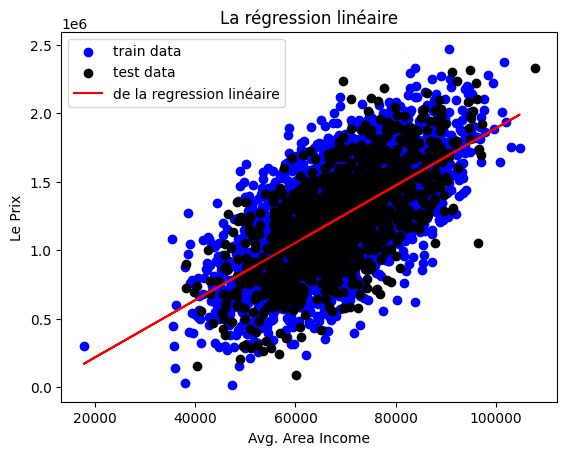

In [183]:
plt.scatter(X_train, y_train, color="blue", label="train data")
plt.scatter(X_test, y_test, color="black", label="test data")
plt.plot(X_train, model_lineaire.predict(X_train), color="red", label="de la regression linéaire")
plt.xlabel("Avg. Area Income")
plt.ylabel("Le Prix")
plt.title("La régression linéaire")
plt.legend()
plt.show

## Prediction simple 

In [184]:
resultat = pd.DataFrame({"y_test": y_test, "y_score_predicts": y_score_predicts})
resultat

,y_test,y_score_predicts
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


In [185]:
print(model_lineaire.predict([[600]]))

[-189757.30814435]
